<a href="https://colab.research.google.com/github/345lakshayaggarwal-prog/EDA-Using-Python/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TIME SERIES ANALYSIS**

Getting Start

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
#1 Load and Prepare data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AEP_hourly.csv', parse_dates=['Datetime'], index_col='Datetime')
df.rename(columns={'AEP_MW':'AEP'},inplace=True)
print('Data Head:\n',df.head())

Data Head:
                          AEP
Datetime                    
2004-12-31 01:00:00  13478.0
2004-12-31 02:00:00  12865.0
2004-12-31 03:00:00  12577.0
2004-12-31 04:00:00  12517.0
2004-12-31 05:00:00  12670.0


In [ ]:
#2 Convert to Quaterly Mean
quaterly = df.resample('Q').mean()
quaterly.head()

/tmp/ipython-input-3891822475.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quaterly = df.resample('Q').mean()


,AEP
Datetime,
2004-12-31,15176.724388
2005-03-31,16513.130093
2005-06-30,14645.554741
2005-09-30,16499.762228
2005-12-31,15714.468509


**Trend/Seasonality Decomposition**

In [ ]:
# Decompose into Trend/Seasonal/Residual
decomposition = seasonal_decompose(df, model='multiplicative', period=12)

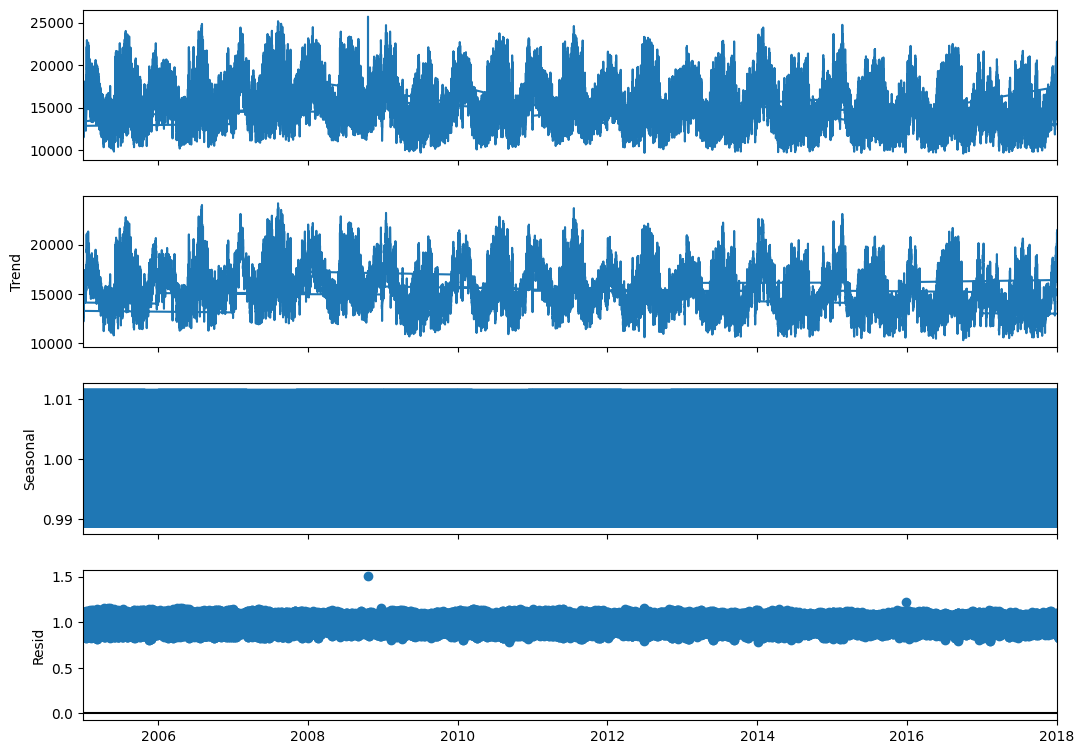

In [ ]:
# Plot components
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

**MOVING** **AVERAGE**

In [ ]:
# 6-month and 12-month moving averages
df['MA_6'] = df['AEP'].rolling(window=6).mean()
df['MA_12'] = df['AEP'].rolling(window=12).mean()

Text(0.5, 1.0, 'Moving Averages Smoothing')

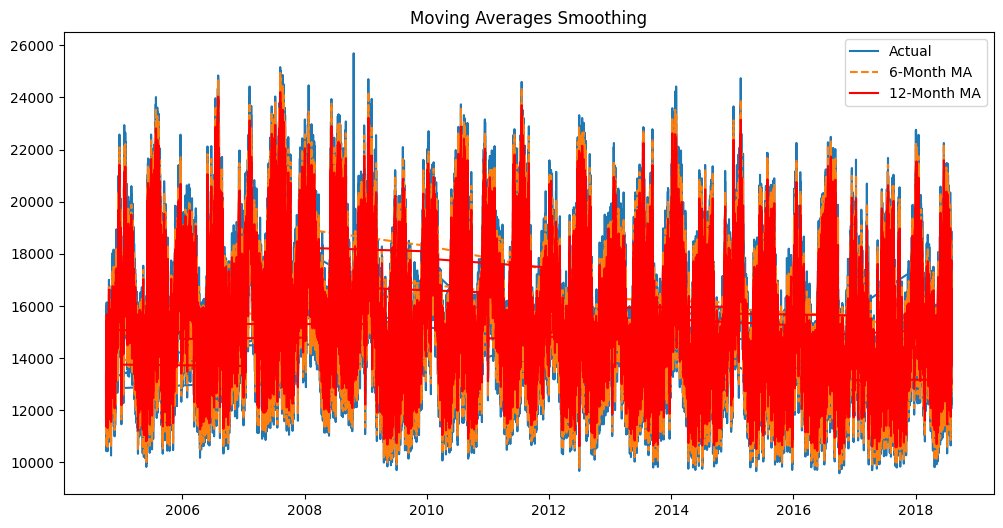

In [ ]:
# Plot comparison
plt.figure(figsize=(12, 6))
plt.plot(df['AEP'], label='Actual')
plt.plot(df['MA_6'], label='6-Month MA', linestyle='--')
plt.plot(df['MA_12'], label='12-Month MA', color='red')
plt.legend(); plt.title('Moving Averages Smoothing')

**ARIMA FORECASTING**

In [ ]:
# Split data (last 12 months for testing)
train = df.iloc[:-12]
test = df.iloc[-12:]

In [ ]:
# Fit ARIMA(p,d,q)(P,D,Q)s model
model = ARIMA(train['AEP'], order=(2,1,1), seasonal_order=(1,1,1,12))
result = model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsm

In [ ]:
# Forecast and evaluate
forecast = result.forecast(steps=12)
rmse = np.sqrt(mean_squared_error(test['AEP'], forecast))
print(f"RMSE: {rmse:.1f} AEP")

RMSE: 565.2 AEP


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


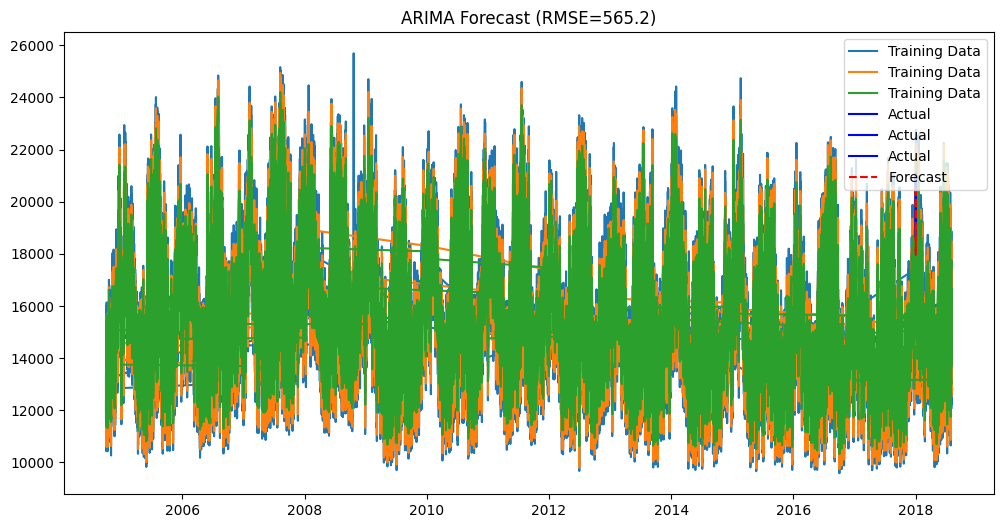

In [ ]:
# Plot forecast vs actual
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual', color='blue')
plt.plot(test.index, forecast, label='Forecast', color='red', linestyle='--')
plt.fill_between(test.index, forecast*0.8, forecast*1.2, alpha=0.2)
plt.title(f"ARIMA Forecast (RMSE={rmse:.1f})")
plt.legend()